In [52]:
import ruptures as rpt
import numpy as np
import matplotlib.pyplot as plt

In [53]:
from utils.waves import gen_sine, gen_sequence

In [54]:
amplitude = 0.25
frequency = 92.5
sr = 48000
secs = 1/64
noise = 0.05

frequencies = [146,155,118,205,98]
times = [1,0.5,3,1,0.5]

song1_wave = gen_sequence(frequencies, times, wave_gen_fn=gen_sine, sr=48000, amplitude=1, x_intercept=0)[:, 0]
chunk_size = int(secs*sr)
chunks = np.stack([song1_wave[i*chunk_size:i*chunk_size+chunk_size] for i in range(int(len(song1_wave)/chunk_size))])
chunks.shape

(384, 750)

In [55]:
from tensorflow.keras.models import load_model
model = load_model('../models/note_detect.h5', compile=False)

In [56]:
y_preds = model.predict(chunks).flatten()
y_preds

array([135.63881 , 145.51146 , 140.88342 , 138.54349 , 133.19531 ,
       146.28127 , 140.43935 , 135.61949 , 140.66151 , 142.41104 ,
       136.78578 , 137.49829 , 148.89374 , 137.92297 , 134.08401 ,
       137.00563 , 144.84634 , 138.38116 , 137.2939  , 148.03035 ,
       137.79842 , 135.60548 , 135.59998 , 146.06966 , 137.42497 ,
       136.88982 , 146.76447 , 143.0678  , 141.90965 , 133.56126 ,
       145.18675 , 138.78418 , 135.63881 , 145.51146 , 140.88342 ,
       138.54349 , 133.19531 , 146.28127 , 140.43935 , 135.61949 ,
       140.66151 , 142.41104 , 136.78578 , 137.49829 , 148.89374 ,
       137.92297 , 134.08401 , 137.00563 , 144.84634 , 138.38116 ,
       137.2939  , 148.03035 , 137.79842 , 135.60548 , 135.59998 ,
       146.06966 , 137.42497 , 136.88982 , 146.76447 , 143.0678  ,
       141.90965 , 133.56126 , 145.18675 , 138.78418 , 148.32336 ,
       151.1947  , 143.70348 , 149.72054 , 151.02228 , 153.54877 ,
       146.75334 , 149.41098 , 155.31377 , 148.36441 , 151.075

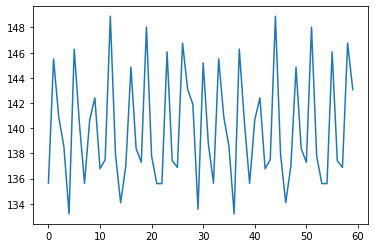

In [57]:
plt.plot(y_preds[:60])

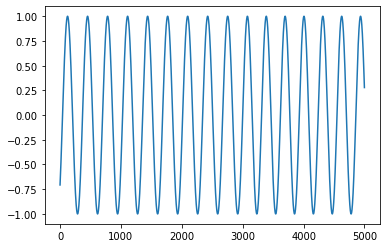

In [58]:
plt.plot(song1_wave[45000:50000])

In [59]:
algo_python = rpt.Pelt(model="l2", jump=1, min_size=2).fit(
    y_preds)

penalty_value = 100  # beta
result = algo_python.predict(pen=penalty_value)
print(result)

[64, 96, 288, 290, 350, 352, 384]


In [60]:
print(np.mean(y_preds[:result[0]-1]))
print(np.mean(y_preds[result[0]:result[1]]))


139.97452
148.60551


In [61]:
y_preds[63]

138.78418

(<Figure size 720x144 with 1 Axes>, [<AxesSubplot:>])

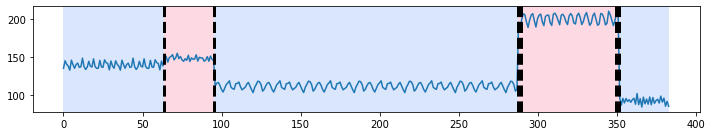

In [62]:
rpt.display(y_preds, np.cumsum(times)*64, result)
